# HW 1: Linear Algebra and Floating Point Arithmetic

```{warning}
The submission of the homeworks has **NO** deadline. You can submit them whenever you want, on Virtuale. You are only required to upload it on Virtuale **BEFORE** your exam session, since the Homeworks will be a central part of the oral exam. 

You are asked to submit the homework as one of the two, following modalities:
* A PDF (or Word) document, containing screenshoots of code snippets, screeshots of the results generated by your code, and a brief comment on the obtained results.
* A Python Notebook (i.e. a `.ipynb` file), with cells containing the code required to solve the indicated exercises, alternated with a brief comment on the obtained results in the form of a markdown cell. We remark that the code **SHOULD NOT** be runned during the exam, but the student is asked to enter the exam with all the programs **already executed**, with the results clearly visible on the screen.

Joining the oral exam with a non-executed code **OR** without a PDF file with the obtained results visible on that, will cause the student to be rejected.
```

### Direct Methods for the solution of Linear Systems
1. Given a matrix $A \in \mathbb{R}^{n \times n}$, the vector $x_{true} = (1,1,...,1)^T \in \mathbb{R}^n$, and a value for $n$, write a script that:
    - Computes the right-hand side of the linear system $y = A x_{true}$ (test problem).
    - Computes the condition number in 2-norm of the matrix $A$. It is ill-conditioned? What if we use the $\infty$-norm instead of the 2-norm?
    - Solves the linear system $Ax = y$ with the function `np.linalg.solve()`.
    - Computes the relative error between the computed solution and the true solution $x_{true}$.
    - Plot a graph (using `matplotlib.pyplot`) with the relative errors as a function of $n$ and (in a different window) the condition number in 2-norm and in $\infty$-norm, as a function of $n$.

2. Test the program above with the following choices of $A \in \mathbb{R}^{n \times n}$:
    - A random matrix (created with the function `np.random.rand()`) with size varying in $n = \{10, 20, 30, ..., 100\}$.
    - The Vandermonde matrix (`np.vander`) with dimension $n= \{5,10,15,20,25,30\}$ with respect to the vector $v = {1,2,3,...,n}$.
    - The Hilbert matrix (`scipy.linalg.hilbert`) with dimension $n= \{4, 5, 6, ..., 12\}$.

Analyzing Random Matrices...


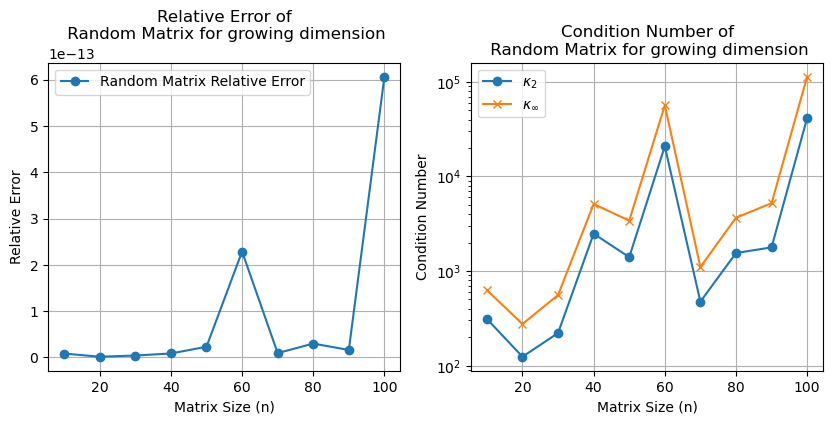

Analyzing Vandermonde Matrices...


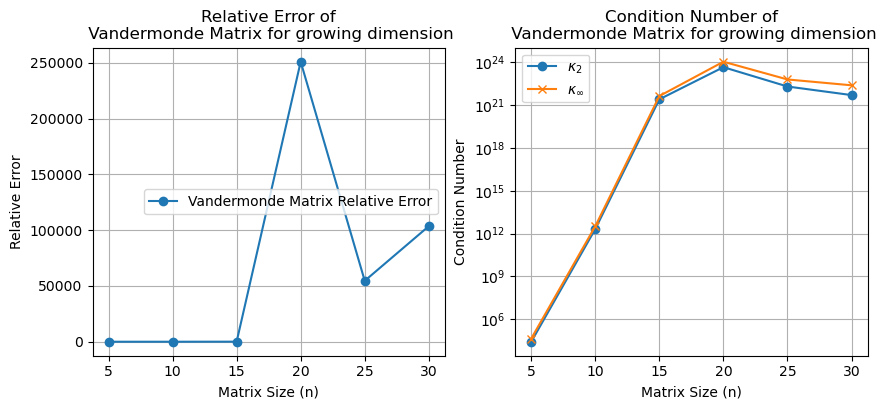

Analyzing Hilbert Matrices...


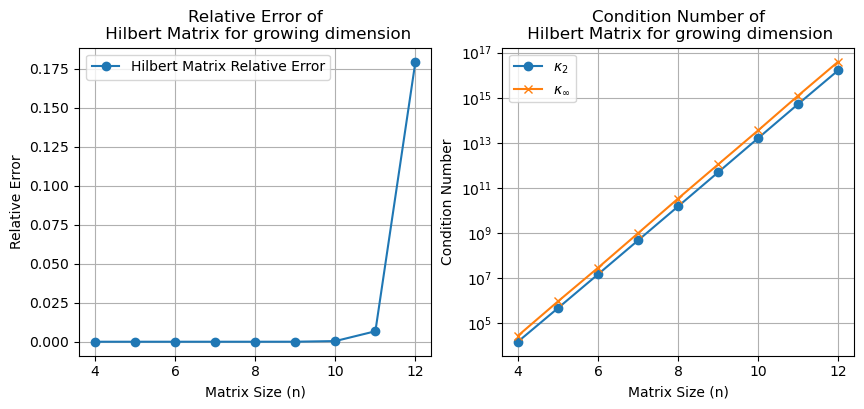

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import hilbert

# Define the main function
def linear_system_analysis(A_func, n_values, matrix_type="Matrix"):
    relative_errors = []
    condition_numbers_2 = []
    condition_numbers_inf = []

    for n in n_values:
        # Generate A and x_true
        A = A_func(n)
        x_true = np.ones(n)
        
        # Compute the right-hand side y = A * x_true 
        y = A @ x_true
        
        # Compute condition numbers for 2-norm and inf-norm
        cond_2 = np.linalg.cond(A, 2)  
        cond_inf = np.linalg.cond(A, np.inf)  
        
        # Solve the system Ax = y
        x_sol = np.linalg.solve(A, y)
        
        # Compute the relative error
        relative_error = np.linalg.norm(x_true - x_sol, 2) / np.linalg.norm(x_true, 2)
        
        # Store results
        relative_errors.append(relative_error)
        condition_numbers_2.append(cond_2)
        condition_numbers_inf.append(cond_inf)

    # Plot relative errors
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(n_values, relative_errors, marker='o', label=f"{matrix_type} Relative Error")
    plt.xlabel("Matrix Size (n)")
    plt.ylabel("Relative Error")
    plt.title(f"Relative Error of\n {matrix_type} for growing dimension")
    plt.grid()
    plt.legend()

    # Plot condition numbers
    plt.subplot(1, 2, 2).set_yscale('log')
    
    plt.plot(n_values, condition_numbers_2, marker='o', label=r"$\kappa_2$")
    plt.plot(n_values, condition_numbers_inf, marker='x', label=r"$\kappa_\infty$")
    plt.xlabel("Matrix Size (n)")
    plt.ylabel("Condition Number")
    plt.title(f"Condition Number of\n {matrix_type} for growing dimension")
    plt.grid()
    plt.legend()

    plt.show()


# Test cases
# 1. Random Matrix
print("Analyzing Random Matrices...")
linear_system_analysis(lambda n: np.random.rand(n, n), range(10, 101, 10), "Random Matrix")

# 2. Vandermonde Matrix
print("Analyzing Vandermonde Matrices...")
linear_system_analysis(lambda n: np.vander(np.arange(1, n+1)), [5, 10, 15, 20, 25, 30], "Vandermonde Matrix")

# 3. Hilbert Matrix
print("Analyzing Hilbert Matrices...")
linear_system_analysis(hilbert, range(4, 13), "Hilbert Matrix")


### Floating point arithmetic

1. The Machine epsilon $\epsilon$ is defined as the smallest floating point number such that it holds: $fl(1 + \epsilon) > 1$. Compute $\epsilon$. *Tips:* use a `while` structure.

2. Let’s consider the sequence $a_n = (1 + \frac{1}{n})^n$. It is well known that: $\lim_{n \to \infty} a_n = e$, where $e$ is the Nepero number. Choose diﬀerent values for $n$, compute $a_n$ and compare it to the real value of the Nepero number. What happens if you choose a large value of $n$?

3. Let’s consider the matrices:

$$
A = \begin{bmatrix} 4 & 2 \\ 1 & 3 \end{bmatrix} \quad B = \begin{bmatrix} 4 & 2 \\ 2 & 1 \end{bmatrix}
$$

Compute the rank of $A$ and $B$ and their eigenvalues. Are $A$ and $B$ full-rank matrices? Can you infer some relationship between the values of the eigenvalues and the full-rank condition? Please, corroborate your deduction with other examples. *Tips:* Please, have a look at `np.linalg`.

In [3]:
# Compute machine epsilon
epsilon = 1.0
while 1.0 + epsilon > 1.0:
    epsilon /= 2
epsilon *= 2  # Last value that satisfied the condition

print(f"Machine epsilon is: {epsilon}")


Machine epsilon is: 2.220446049250313e-16


In [4]:
import numpy as np

# Real value of e using numpy
e_true = np.exp(1)

# Compute a_n for increasing values of n
n_values = [1, 10, 100, 1000, 10000, 100000]
def e_gen(n):
    return (1+(1/n))**n

# Compare with the true value of e
print(f"True value of e: {e_true}")
for n in n_values:
    e_computed = e_gen(n)
    print(f"n = {n}, a_n = {e_computed}, error = {abs(e_computed - e_true)}")

n_values_b = range(1, 100000, 1000)
error_vector = []
for n in n_values_b:
    e_computed = e_gen(n)
    err = abs(e_computed - e_true)
    error_vector.append(err)



True value of e: 2.718281828459045
n = 1, a_n = 2.0, error = 0.7182818284590451
n = 10, a_n = 2.5937424601000023, error = 0.12453936835904278
n = 100, a_n = 2.7048138294215285, error = 0.01346799903751661
n = 1000, a_n = 2.7169239322355936, error = 0.0013578962234515046
n = 10000, a_n = 2.7181459268249255, error = 0.000135901634119584
n = 100000, a_n = 2.7182682371922975, error = 1.359126674760347e-05


In [5]:
import numpy as np

# Define matrices
A = np.array([[4, 2], [1, 3]])
B = np.array([[4, 2], [2, 1]])

# Compute rank and eigenvalues
rank_A = np.linalg.matrix_rank(A)
rank_B = np.linalg.matrix_rank(B)
eigenvalues_A = np.linalg.eigvals(A)
eigenvalues_B = np.linalg.eigvals(B)

print(f"Matrix A: Rank = {rank_A}, Eigenvalues = {eigenvalues_A}")
print(f"Matrix B: Rank = {rank_B}, Eigenvalues = {eigenvalues_B}")



Matrix A: Rank = 2, Eigenvalues = [5. 2.]
Matrix B: Rank = 1, Eigenvalues = [5. 0.]


We can notice how if you have a zero in the eigenvalues, the matrix is not full rank! Indeed the rows of B matrix are not linearly independent. 

In [8]:
## Let's try to make a new example to confirm our deduction, with another matrix 
# made of linearly dependent vectors

C = np.array([[1, 1], [2, 2]])
rank_C = np.linalg.matrix_rank(C)
eigenvalues_C = np.linalg.eigvals(C)
print(f"Matrix C: Rank = {rank_C}, Eigenvalues = {eigenvalues_C}")

## What happens with more linearly dependent vectors?

D = np.array([[1, 1, 1, 1], [2, 2, 2, 2], [3, 3, 3, 3], [4, 4, 4, 4]])
rank_D = np.linalg.matrix_rank(D)
eigenvalues_D = np.linalg.eigvals(D)
print(f"Matrix D: Rank = {rank_D}, Eigenvalues = {eigenvalues_D}")

Matrix C: Rank = 1, Eigenvalues = [0. 3.]
Matrix D: Rank = 1, Eigenvalues = [0.00000000e+00 1.00000000e+01 1.57943625e-17 2.38807843e-16]
